<a href="https://colab.research.google.com/github/aslanidze/Machine_Learning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
Uploaded = files.upload ()

Saving cell_samples.csv to cell_samples.csv


In [ ]:
import pandas as pd

# خواندن فایل CSV
df = pd.read_csv('cell_samples.csv')

# نمایش ۵ سطر اول دادهها
print(df.head())

# بررسی اطلاعات کلی (تعداد سطرها، ستونها، نوع دادهها)
print(df.info())

# آمار توصیفی دادهها
print(df.describe())

        ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-nul

In [ ]:

# نمایش داده‌های غیرعددی در ستون BareNuc
non_numeric = df[~df['BareNuc'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
# print(non_numeric)

# تبدیل داده‌های غیرعددی به عددی (در صورت ممکن)
df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

# حذف یا جایگزینی مقادیر غیرعددی با میانگین مقادیر عددی
df['BareNuc'].fillna(df['BareNuc'].mean(), inplace=True)

# ذخیره فایل CSV به‌روز شده
df.to_csv('updated_file.csv', index=False)

<ipython-input-3-a99bab283044>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BareNuc'].fillna(df['BareNuc'].mean(), inplace=True)


In [ ]:
# بررسی دادههای گمشده
print(df.isnull().sum())

# حذف ستون ID (غیرضروری برای مدلسازی)
df = df.drop(columns=['ID'])

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64


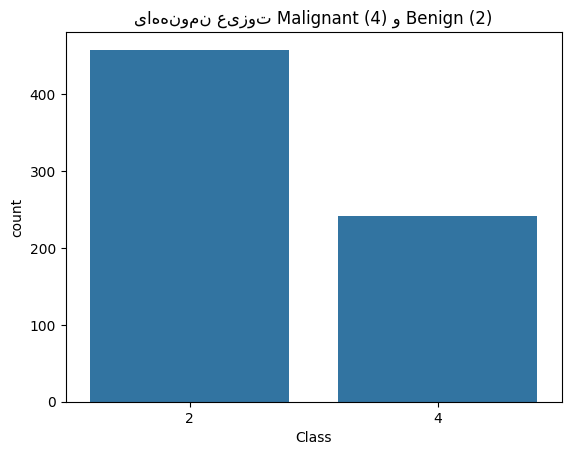

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# توزیع کلاس Class
tex = 'توزیع نمونه‌های'
sns.countplot(x='Class', data=df)
plt.title(f'{tex[::-1]} Malignant (4) و Benign (2)')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# جداسازی ویژگی‌ها و برچسب‌ها
X = df.drop(columns=['Class'])
y = df['Class']

# انتخاب ویژگی‌های مهم
selected_features = ['BareNuc', 'Clump', 'BlandChrom', 'UnifShape', 'Mit']
X_selected = X[selected_features]

# استانداردسازی ویژگی‌ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# تبدیل X_scaled به DataFrame با نام ستون‌ها
X_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# تنظیم هایپرپارامترها
params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# جستجوی شبکه‌ای برای بهترین هایپرپارامترها
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

# بهترین مدل
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# ارزیابی مدل
print('دقت بهبودیافته:', accuracy_score(y_test, y_pred))

# محاسبه اهمیت ویژگی‌ها
"""importance = pd.DataFrame({
       'Feature': X_scaled.columns,
       'Importance': best_model.coef_[0]
   }).sort_values('Importance', ascending=False)"""

# print(importance)

Train set: (559, 5) (559,)
Test set: (140, 5) (140,)
دقت بهبودیافته: 0.9642857142857143


"importance = pd.DataFrame({\n       'Feature': X_scaled.columns,\n       'Importance': best_model.coef_[0]\n   }).sort_values('Importance', ascending=False)"

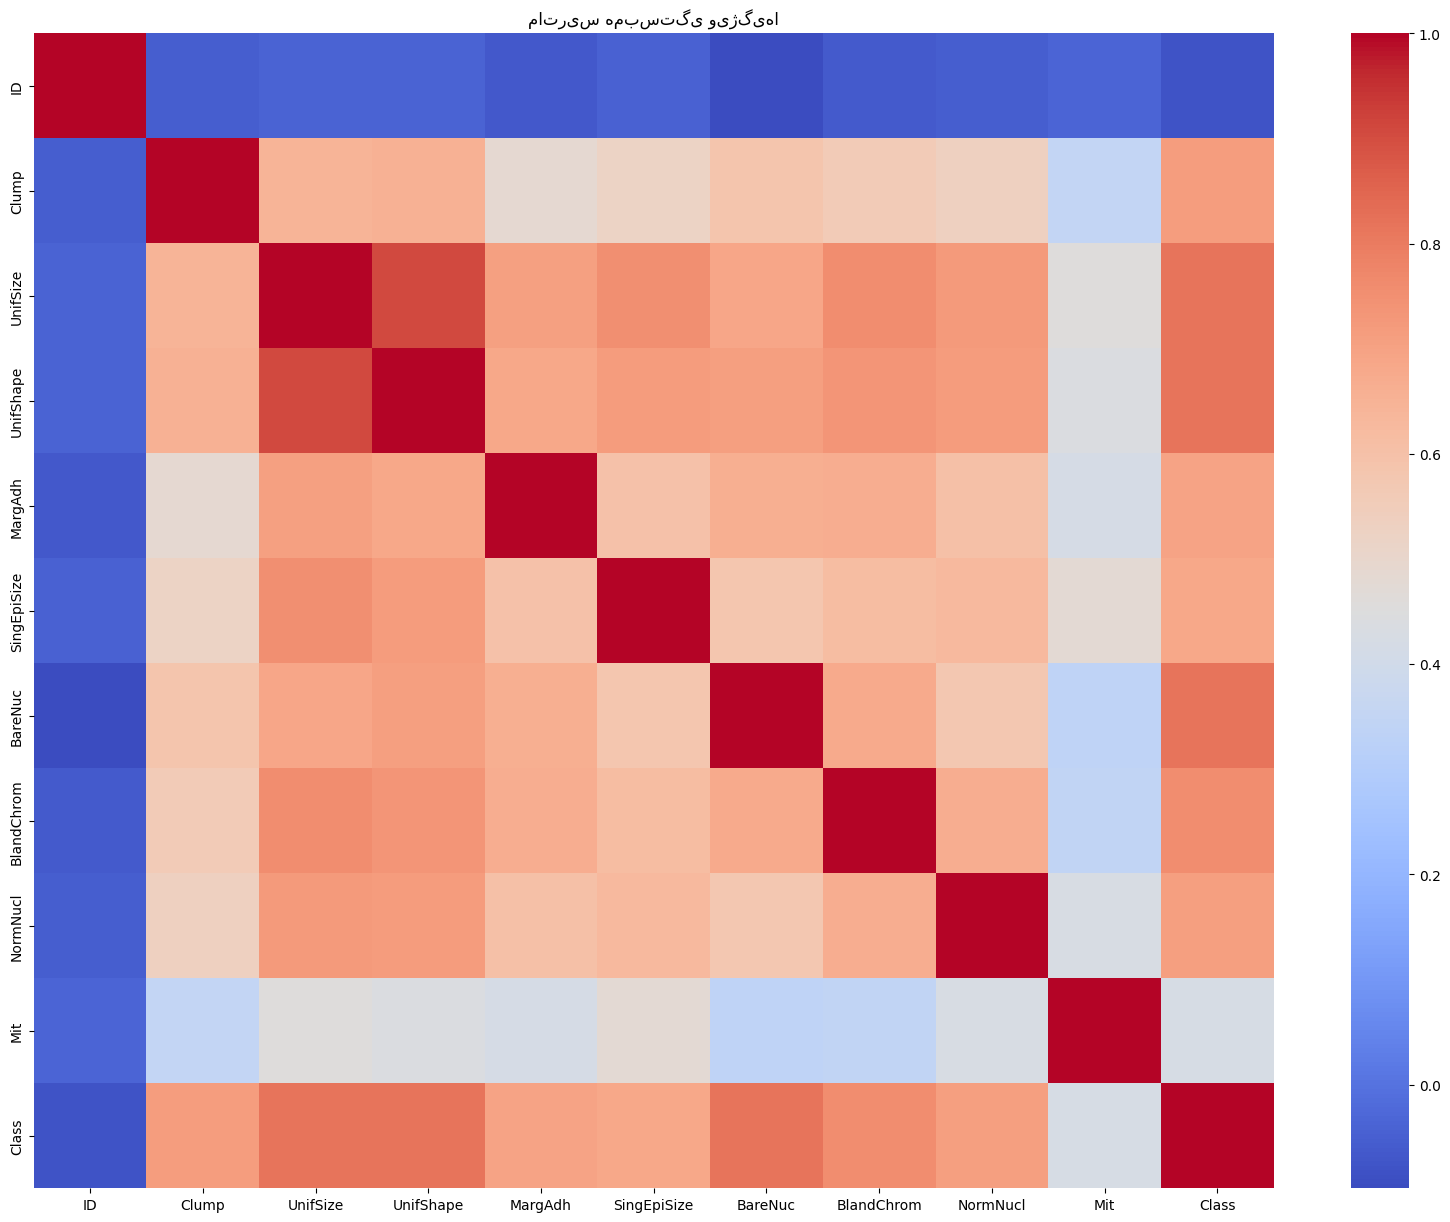

In [ ]:
# ماتریس همبستگی
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('ماتریس همبستگی ویژگیها')
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, classification_report

# ارزیابی مدل
print('دقت مدل:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

دقت مدل: 0.9642857142857143
              precision    recall  f1-score   support

           2       0.96      0.99      0.97        95
           4       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

